In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc,RocCurveDisplay


In [3]:
from ucimlrepo import fetch_ucirepo
digits = fetch_ucirepo(id=80)
X = digits.data.features   
y = digits.data.targets.values.ravel()   

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) 

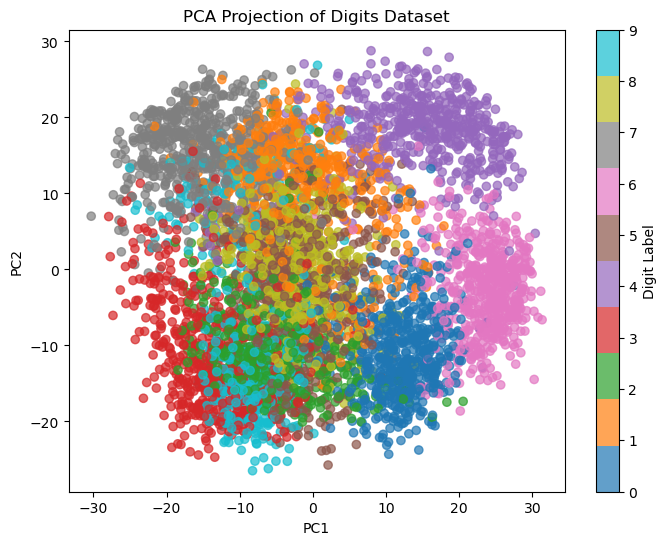

In [6]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("PCA Projection of Digits Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [7]:
feature_name = X.columns

In [8]:
loadings = pd.DataFrame(
    pca.components_.T,  
    columns=["PC1", "PC2"],
    index=feature_name  
)

print("Feature contributions to PC1 and PC2:")
print(loadings)

Feature contributions to PC1 and PC2:
                  PC1       PC2
Attribute1   0.000000 -0.000000
Attribute2  -0.015158 -0.013751
Attribute3  -0.164802 -0.175415
Attribute4  -0.090766 -0.152106
Attribute5  -0.098777  0.081262
...               ...       ...
Attribute60 -0.077055 -0.161881
Attribute61  0.157434 -0.180054
Attribute62  0.105263 -0.236884
Attribute63  0.036905 -0.102956
Attribute64  0.000055 -0.012437

[64 rows x 2 columns]


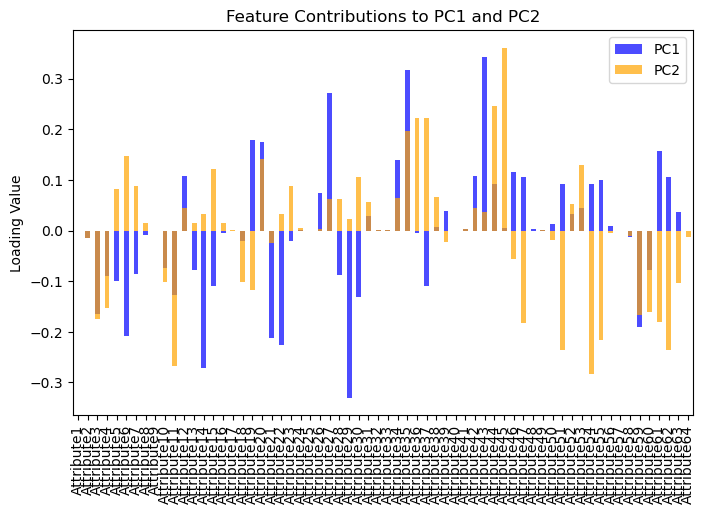

In [9]:
plt.figure(figsize=(8,5))
loadings["PC1"].plot(kind="bar", alpha=0.7, color="blue", label="PC1")
loadings["PC2"].plot(kind="bar", alpha=0.7, color="orange", label="PC2")
plt.title("Feature Contributions to PC1 and PC2")
plt.ylabel("Loading Value")
plt.legend()
plt.show()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', gamma=0.01, C=10, probability=True)  # probability=True for ROC
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    
    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}

results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.961744   0.961897  0.961706  0.961752
KNN                  0.988434   0.988577  0.988416  0.988457
Random Forest        0.987544   0.987717  0.987531  0.987565
SVM                  0.879004   0.944170  0.879144  0.896447


In [12]:
pca_full = PCA()
pca_full.fit(X_scaled)
expl_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(expl_var)

n_components = np.argmax(cum_var >= 0.95) + 1
print("Number of components for 95% variance:", n_components)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
print("Shape after PCA:", X_pca.shape)

Number of components for 95% variance: 42
Shape after PCA: (5620, 42)


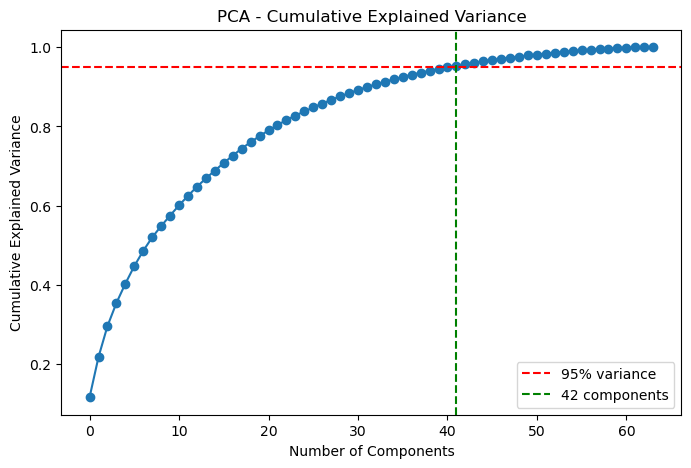

In [13]:
plt.figure(figsize=(8,5))
plt.plot(cum_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% variance")
plt.axvline(x=n_components-1, color='g', linestyle='--', label=f"{n_components} components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.legend()
plt.show()


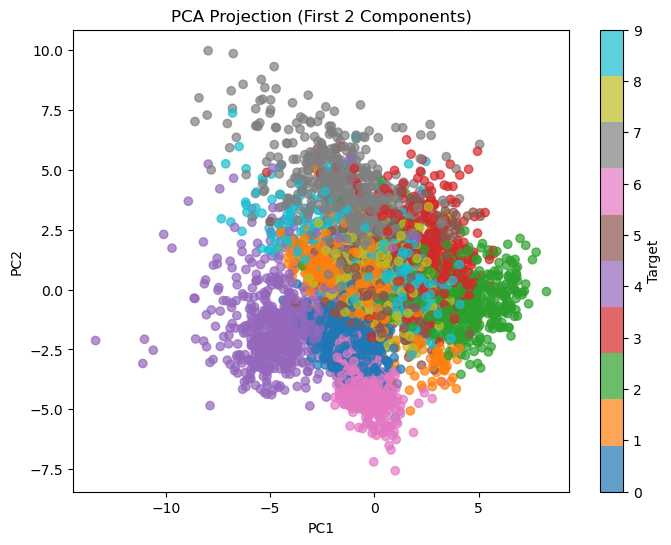

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7)
plt.colorbar(label="Target")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (First 2 Components)")
plt.show()


In [15]:
import pickle

best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Best model saved as best_model.pkl")


Best model saved as best_model.pkl
